# QSR Recommender - Solution

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading The Dataset
Typically, datasets are provided in the Comma Separated Value (CSV) format. However, the QSR dataset is provided in the Microsoft Excel format. 

`QUESTION 1`: 
In the code cell below, how would you read an Excel (xlsx) formatted dataset into a Pandas DataFrame called `df`?

`SOLUTION 1`:
Fortunately, Pandas can read Excel files with the `read_excel()` function.

In [58]:
df = pd.read_excel('../data/QSR final dataset.xlsx')

## Viewing The Dataset

`QUESTION 2`:
In the code cell below, how would you view the first 5 rows of the dataset? The first 10? How about viewing a random sample of a single row?

`SOLUTION 2`:
* The `head()` function can be used to view the first 5 rows of the dataset.
* The `head(n)` function can be used to view the first `n` rows of the dataset.
* The `sample()` function can be used to view a random sample of a single row.

In [59]:
df.head()

,Unnamed: 0,ID,Zip.code,Gender,Marital,academic,Age,num.month,favorite.QSR,num.people,...,drive..tru,discounts,healthy.food,menu,last.visit,visit.again,recommend,Profession,Information.Source,Professional
0,1,1,72830.0,2,2,4,2,6,BURGER KING,1,...,4,4,4,4,5,4,4,Student,multiple.way,NaN
1,2,2,72845.0,2,2,4,1,28,BURGER KING,1,...,3,2,2,3,3,4,4,Student,drive,NaN
2,3,3,72560.0,1,2,3,1,15,MCDONALD'S,1,...,5,4,2,5,5,5,4,Student,sign,NaN
3,4,4,71935.0,1,3,3,1,4,SONIC,2,...,5,5,2,5,5,5,5,Student,other,NaN
4,5,5,72745.0,2,2,3,1,4,TACO BELL,1,...,5,3,4,5,5,5,5,Student,drive,NaN


In [60]:
df.head(10)

,Unnamed: 0,ID,Zip.code,Gender,Marital,academic,Age,num.month,favorite.QSR,num.people,...,drive..tru,discounts,healthy.food,menu,last.visit,visit.again,recommend,Profession,Information.Source,Professional
0,1,1,72830.0,2,2,4,2,6,BURGER KING,1,...,4,4,4,4,5,4,4,Student,multiple.way,NaN
1,2,2,72845.0,2,2,4,1,28,BURGER KING,1,...,3,2,2,3,3,4,4,Student,drive,NaN
2,3,3,72560.0,1,2,3,1,15,MCDONALD'S,1,...,5,4,2,5,5,5,4,Student,sign,NaN
3,4,4,71935.0,1,3,3,1,4,SONIC,2,...,5,5,2,5,5,5,5,Student,other,NaN
4,5,5,72745.0,2,2,3,1,4,TACO BELL,1,...,5,3,4,5,5,5,5,Student,drive,NaN
5,6,6,72031.0,2,2,4,1,28,MCDONALD'S,1,...,5,5,3,5,5,5,5,Student,drive,NaN
6,7,7,72634.0,1,2,3,1,16,TACO BELL,3,...,5,3,2,4,5,5,5,Student,drive,NaN
7,8,8,72635.0,1,2,3,1,12,MCDONALD'S,4,...,4,5,4,4,4,5,4,Student,multiple.way,NaN
8,9,9,72801.0,1,2,3,1,12,MCDONALD'S,4,...,2,5,1,4,4,5,4,Student,mobile,NaN
9,10,10,72762.0,1,2,4,1,12,TACO BELL,2,...,5,5,2,5,5,5,5,Student,multiple.way,NaN


In [61]:
df.sample() # note, this is a random sample so it will change each time you run it

,Unnamed: 0,ID,Zip.code,Gender,Marital,academic,Age,num.month,favorite.QSR,num.people,...,drive..tru,discounts,healthy.food,menu,last.visit,visit.again,recommend,Profession,Information.Source,Professional
414,415,104,72801.0,2,2,6,2,12,ARBY'S,1,...,5,3,3,5,5,5,5,Customer Service/Sales,friend.relative,CASHIER


## What Is That `Unnamed: 0` Column?
The `Unnamed: 0` column is a result of reading the Excel file into a Pandas DataFrame.
The index is provided in the dataset via the `ID` column. Therefore, we can remove the `Unnamed: 0` column.

`QUESTION 3`:
In the code cell below, how would you remove the `Unnamed: 0` column from the DataFrame? How would you set the `ID` column as the index of the DataFrame?

`SOLUTION 3`:
* The `drop()` function can be used to remove the `Unnamed: 0` column from the DataFrame.
* The `set_index()` function can be used to set the `ID` column as the index of the DataFrame.

Once you have removed the `Unnamed: 0` column and set the `ID` column as the index, you can view the first 5 rows of the dataset again to see the changes.


In [62]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.set_index('ID', inplace=True)

In [63]:
df.head()

,Zip.code,Gender,Marital,academic,Age,num.month,favorite.QSR,num.people,appealing,seat,...,drive..tru,discounts,healthy.food,menu,last.visit,visit.again,recommend,Profession,Information.Source,Professional
ID,,,,,,,,,,,,,,,,,,,,,
1,72830.0,2,2,4,2,6,BURGER KING,1,3,3,...,4,4,4,4,5,4,4,Student,multiple.way,NaN
2,72845.0,2,2,4,1,28,BURGER KING,1,2,5,...,3,2,2,3,3,4,4,Student,drive,NaN
3,72560.0,1,2,3,1,15,MCDONALD'S,1,3,3,...,5,4,2,5,5,5,4,Student,sign,NaN
4,71935.0,1,3,3,1,4,SONIC,2,4,5,...,5,5,2,5,5,5,5,Student,other,NaN
5,72745.0,2,2,3,1,4,TACO BELL,1,5,4,...,5,3,4,5,5,5,5,Student,drive,NaN


# Statistical Analysis
Before creating visualizations to gain insights on our data, we need to observe the dataset's statistical analysis. This will help us understand the data better and determine what visualizations to create, as well as what machine learning algorithms to use (in this case we'll use a recommendation algorithm).

`QUESTION 4`:
In the code cell below, how would you view the statistical analysis of the dataset? The mean? The standard deviation? The minimum? The maximum? The median? The mode?
What about the shape of the dataset?

`SOLUTION 4`:
* The `describe()` function can be used to view the statistical analysis of the dataset.
* The `info()` function can be used to view the mean, standard deviation, minimum, and maximum of the dataset all in a single method. Additionally, the `info()` function can be used to view the number of non-null values in each column.
* The `shape` attribute can be used to view the shape of the dataset.

In [64]:
df.describe()

,Zip.code,Gender,Marital,academic,Age,num.month,num.people,appealing,seat,parking,...,Variety,value,location,drive..tru,discounts,healthy.food,menu,last.visit,visit.again,recommend
count,613.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,...,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,72540.269168,1.570732,1.738211,4.066667,2.055285,11.808130,2.458537,4.078049,4.234146,3.998374,...,4.190244,4.139837,4.232520,4.128455,3.595122,3.261789,4.193496,4.318699,4.546341,4.263415
std,3410.907964,0.505142,0.574785,2.088540,1.345835,10.375786,1.439719,0.856336,0.852552,0.987708,...,0.922697,0.934303,0.907577,1.095484,1.114156,1.337782,0.996716,0.844155,0.789208,0.935481
min,10996.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,72801.000000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,4.000000,4.000000,4.000000,4.000000
50%,72801.000000,2.000000,2.000000,5.000000,1.000000,8.000000,2.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,5.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000
75%,72802.000000,2.000000,2.000000,6.000000,3.000000,16.000000,3.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000
max,89085.000000,3.000000,3.000000,6.000000,6.000000,135.000000,6.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 1 to 304
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip.code            613 non-null    float64
 1   Gender              615 non-null    int64  
 2   Marital             615 non-null    int64  
 3   academic            615 non-null    int64  
 4   Age                 615 non-null    int64  
 5   num.month           615 non-null    int64  
 6   favorite.QSR        615 non-null    object 
 7   num.people          615 non-null    int64  
 8   appealing           615 non-null    int64  
 9   seat                615 non-null    int64  
 10  parking             615 non-null    int64  
 11  cleanliness         615 non-null    int64  
 12  appearance          615 non-null    int64  
 13  friendliness        615 non-null    int64  
 14  knowledge           615 non-null    int64  
 15  received            615 non-null    int64  
 16  billing 

In [66]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
df.shape

The dataset has 615 rows and 37 columns


(615, 37)

# Feature Selection
Before creating visualizations, we should understand what features are best suited for our goal of recommending QSRs to future students. Feature selection is the process of selecting the most relevant features in your data when developing a machine learning model. Irrelevant features can negatively impact model performance. For our case, we can visualize the most relevant features!

`QUESTION 5`:
In the code cell below, filter out features that are not relevant to our goal of recommending QSRs to future students. What features are relevant? What features are not relevant?

`HINT`:
* The `drop()` function can be used to filter out features that are not relevant to our goal of recommending QSRs to future students.
* The `corr()` function can be used to generate the correlation between features, while Seaborn's `heatmap()` function can create a visualization.
* Does marital status really effect where people eat? What about number of people that they dine with or their age? Does the location people live affect their views on food (within a relative distance, of course)? What about their gender? Their academic standing? The amount of times they eat out in a month?

`SOLUTION 5`:

In [67]:
df.drop(['Age', 'Marital', 'num.people', 'Zip.code', 'Gender', 'academic', 'num.month'], axis=1, inplace=True)

/var/folders/6v/7rn99w313jv6qjwd64ph8xwr0000gn/T/ipykernel_96594/901541280.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

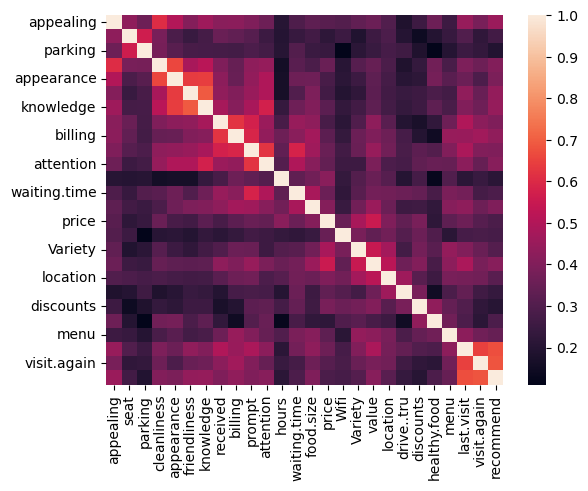

In [68]:
plt.figsize=(20, 20)
sns.heatmap(df.corr())